    # Übung 5

**Gruppenname:**

*Name Ihrer Gruppe*

Gehen Sie wie folgt vor:

1. Bitte benennen Sie jetzt dieses Jupyter Notebook um (z.B. über `File -> Rename`):

   Namensschema: `Gruppenname-X`. Ersetzen Sie "X" mit der oben angegebenen Nummer der Übung.

   - Beispiel 1: Team REZA bearbeitet Übung 2. Das Notebook heißt: REZA-2.
   - Beispiel 2: Sie sind keinem Team zugeordnet (nicht empfehlenswert) und bearbeiten Übung 2: Ihr Notebook heißt: Nachname-2.


2. Tragen Sie Ihren Gruppennamen auch ganz oben bei "Name Ihrer Gruppe" ein.

3. Bearbeiten Sie dann dieses Notebook. Vergessen Sie dabei nicht, das Jupyter Notebook regelmäßig zu speichern (z.B. über `Strg + S` oder über `File -> Save and Checkpoint`).

### In dieser Übung ...

werden Sie einen echten Datenfall bearbeiten, der die Firma Tesla betrifft. In diesem Fall werden Sie sich mit dem Thema *Datenaufbereitung* und dessen Konsequenzen beschäftigen. Nach dieser Aufgabe werden Sie sich noch einmal mit explorativer Analyse und Zusammenhangsmaßen (wie beispielsweise der *Mutual Information*) beschäftigen.

### 5.1 Der Fall Tesla: Autopilot

* In diesem Datenfall üben Sie Ihre Fähigkeiten, Datensätze zu erschließen, aufzubereiten und auf Plausibilität zu prüfen.

Seit wenigen Jahren verstärken verschiedene Unternehmen und Startups ihre Bemühungen, autonome Fahrzeuge zu entwickeln. Solche selbststeuerenden Fahrzeuge versprechen eine Vielzahl neuer Anwendungen und haben das Potenzial, unser Verhältnis zu Autos zu verändern. Manche Visionäre sprechen bereits von "mobility as a service", bei der Autos nicht mehr besessen, sondern per App für eine Fahrt geliehen werden und selbstständig fahren.

Bei der Entwicklung von autonomen Fahrzeugen verfolgen verschiedene Hersteller eine schrittweise Strategie, nach der Assistenzfunktionen zum Parken oder für das Halten der Fahrspur nach und nach den Fahrern zur Verfügung gestellt werden. Tesla stellt den sogenannten *Autopilot* bereit, der das Feature *Autosteer* zum automatischen Halten der Fahrspur enthält.

[Im Jahr 2016 verunglückte Joshua Brown](https://www.nytimes.com/2016/07/02/business/joshua-brown-technology-enthusiast-tested-the-limits-of-his-tesla.html) in Florida in einem Tesla Model S, während das Autosteer Feature aktiviert war. Er war damit der erste (soweit bekannte) Todesfall, der in einem selbstfahrenden Auto eingetreten ist.

Die NHTSA, eine Bundesbehörde der USA im Bereich des Verkehrsministeriums, untersuchte den Fall und forderte Zahlen von Tesla an, die die Sicherheit des Autosteering Features belegen sollten. Anhand dieser Zahlen konnte die Behörde im Jahr 2017 folgende Feststellung machen:

![Abbildung](https://data.bialonski.de/ds/tesla_autosteer_nhtsa.png)

Die Anzahl der Airbag-Auslösungen dient dabei als ein Anhaltspunkt für die Anzahl der Unfälle. Dieser Auswertung zufolge reduziert *Autosteer* die Unfallwahrscheinlichkeit um 40%!

Der dieser Statistik zugrundeliegende Datensatz wurde aufgrund eines Antrags basierend auf dem Informationsfreiheitsgesetz der USA (Freedom of Information Act) verfügbar gemacht und steht Ihnen in dieser Übung zur Verfügung.

**Ihre Daten**

* Sie finden die Daten, die Sie für diese Übung benötigen, [hier](https://data.bialonski.de/ds/tesla.xlsx).


Wir werden die folgenden Eigenschaften [1-6] untersuchen:

1. Kilometerstand (in Meilen) bevor der Installation von Autosteer ("1l Previous Mileage before Autosteer Install").

   * Dieser Wert wurde abgelesen vor Installation von Autosteer.


2. Kilometerstand (in Meilen) nach der Installation von Autosteer ("1l Next Mileage after Autosteer Install")

   * Dieser Wert wurde abgelesen nach Installation von Autosteer.
   
   
3. Gefahrene Meilen vor Autosteer-Installation ("Miles before Autosteer")

   * Dieser Wert wurde von Tesla so angegeben.


4. Gefahrene Meilen nach Autosteer Installation ("Miles after Autosteer")

   * Dieser Wert wurde von Tesla so angegeben.


5. Airbag-Auslösungen vor Autosteer-Installation ("Airbag events before Autosteer")

   * Dieser Wert wurde von Tesla so angegeben.


6. Airbag-Auslösungen nach Autosteer-Installation ("Airbag events after Autosteer")

   * Dieser Wert wurde von Tesla so angegeben.


**Ihre Aufgaben**

Für die nachfolgenden Aufgaben benötigen Sie Ihre Neugier und etwas detektivisches Gespür.

(1) Betrachten Sie zunächst mit einer Tabellenkalkulation den oben hinterlegten Datensatz. Suchen Sie nach den oben erwähnten sechs Eigenschaften. 

   * Importieren Sie nun mithilfe von Pandas die oben sechs erwähnten Eigenschaften aus der Excel-Datei. Dabei kann es hilfreich sein, das entsprechende Sheet der Excel-Datei in Pandas anzugeben, aus dem Sie die Daten importieren müssen.

In [ ]:
import pandas as pd
import io
import numpy as np
from IPython.core.display_functions import display
from sklearn.feature_selection import mutual_info_regression as mir
import matplotlib.pyplot as plt
import seaborn as sbn
# storage_options={}  can be also added as setting parameter.
# tesla_dat = pd.read_excel("./tesla.xlsx",sheet_name='PE16_007_PRODUCTION DATA',
#           keep_default_na= True, usecols= [
#      '1l Previous Mileage before Autosteer Install', '1l Next Mileage after Autosteer Install',
#         'Miles before Autosteer', 'Miles after Autosteer', 'Airbag events before Autosteer',
#         'Airbag events after Autosteer' ], skipfooter=3)
tesla_dat = pd.read_excel("./tesla.xlsx",sheet_name='PE16_007_PRODUCTION DATA',
          keep_default_na= True,usecols="AA,AB,AR,AS,AX,AY",names=['mileage_before','mileage_after',
       'events_before', 'events_after', 'miles_before', 'miles_after'])[1:-4]
tesla_dat[['events_before', 'events_after']] =  tesla_dat[['events_before', 'events_after']].fillna(0)

In [3]:
display(tesla_dat.head())
display(tesla_dat.tail())

,mileage_before,mileage_after,events_before,events_after,miles_before,miles_after
1,12145.0,12145.0,0.0,0.0,12145,7990
2,6165.0,6165.0,0.0,0.0,6165,3183
3,463.0,20147.0,0.0,0.0,463,17036
4,20128.0,20128.0,0.0,0.0,20128,15370
5,13791.0,13791.0,0.0,0.0,13791,11214


,mileage_before,mileage_after,events_before,events_after,miles_before,miles_after
43776,0.0,2.0,0.0,0.0,0,36
43777,0.0,2.0,0.0,0.0,0,55
43778,0.0,0.0,0.0,0.0,0,28
43779,0.0,0.0,0.0,0.0,0,8
43780,0.0,0.0,0.0,0.0,0,282


In [4]:
buffer = io.StringIO()
tesla_dat.info(buf=buffer, max_cols=0)
s = buffer.getvalue()
print(s)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43780 entries, 1 to 43780
Columns: 6 entries, mileage_before to miles_after
dtypes: float64(4), object(2)
memory usage: 2.0+ MB



(2) Von wie vielen Fahrzeugen wurden Daten erhoben? Nennen Sie die Anzahl der Fahrzeuge, indem Sie sie aus Ihren Daten aus Teilaufgabe (1) bestimmen.

In [36]:
tesla_dat.shape[0]

43780

In [23]:
len(tesla_dat)

43777

(3) Reproduzieren Sie die beiden Zahlen der NHTSA Behörde der USA, d.h. berechnen Sie die Anzahl der Airbag-Auslösungen vor Autosteer-Installation pro 1 Million gefahrener Meilen und nach Autosteer-Installation pro 1 Million gefahrener Meilen und geben Sie sie an.

   * Wenn Sie nicht auf die Zahlen der NHTSA kommen, lesen Sie diesen [Rot-13](https://rot13.de/index.php) kodierten Hinweis: Süe qvr Orerpuahat ahgmra Fvr ovggr qvr Qngraervura qerv ovf frpuf jvr vz Nofpuavgg "Vuer Qngra" natrtrora.

In [13]:
def airbag_events_per_million_miles(dat, abg, ms):
    total_miles = dat.loc[:, ms].sum()
    total_events = dat.loc[:, abg].sum()
    return total_events * 1000000.0/total_miles
print('airbag events before install of autosteer: %f\n'
      'and after that one: %f '
      %(airbag_events_per_million_miles(
    dat=tesla_dat, abg='events_before', ms= 'mileage_before'),
      airbag_events_per_million_miles(dat=tesla_dat, ms='mileage_after', abg=
                                      'events_after')))

airbag events before install of autosteer: 1.327404
and after that one: 0.967664 


(4) Bis hierher stimmen unsere Analysen mit der US-Behörde überein. Doch es gibt Ungereimtheiten in den Daten. Betrachten Sie dazu die Datenreihen 1 und 2, d.h. die Kilometerstände (in Meilen) der Fahrzeuge vor und nach der Installation von Autosteer. Vor der Installation von Autosteer wird der Kilometerstand erhoben; nach der Installation von Autosteer wird der Kilometerstand erhoben:

1. Welche Erwartungshaltung haben Sie an die beiden Datensätze? (1 Satz)

2. Explorieren Sie diese beiden Datensätze (Stichwort: Explorative Analyse). Was fällt Ihnen auf? (1 Satz)

Wenn Sie partout nicht mehr weiter kommen, gebe ich Ihnen einen Tipp: Jraa Fvr ibe qre Vafgnyyngvba iba Nhgbfgrre qra Xvybzrgrefgnaq nofpuervora jüeqra, haq anpu qre Vafgnyyngvba rorasnyyf qra Xvybzrfgrefgnaq abgvrera, jüeqra fvpu qvr orvqra Xvybzrgrefgäaqr hagrefpurvqra bqre fbyygra fvr tyrvpu frva?

In [17]:
total_bef = tesla_dat[['miles_before']]
total_aft = tesla_dat[['miles_after']]
display(total_bef.describe())
display(total_aft.describe())
# display(total_aft)

,miles_before
count,43780
unique,7554
top,0
freq,29141


,miles_after
count,43743
unique,13559
top,0
freq,91


**Antwort:** die Zahl der Testfälle und Kilometerstand haben sich nach der Installation des Autosteers erhöhen und somit auch die Zuverlässigkeit vom Testergebnis. Aber 5 Summary

(5) Problem 1: Identifizieren Sie anhand Ihrer Beobachtungen aus Schritt (4) die Fahrzeuge, bei denen Sie genau feststellen konnten, zu welchem Kilometerstand Autosteer tatsächlich installiert worden sein muss. Betrachten Sie **nur** die Fahrzeuge aus dieser Menge, für die tatsächlich gefahrenen Kilometer (mehr als 0) vor der Autosteer-Installation ausgewiesen wurden.

* Wie viele Fahrzeuge erfüllen die gerade genannten Kriterien?
* Bestimmen Sie die Anzahl der Airbag-Auslösungen pro gefahrenen 1 Million Meilen vor und nach der Installation von Autosteer. Geben Sie diese Zahlen an. Was stellen Sie fest? 
* Vergleichen Sie Ihre Zahlen mit den oben angegebenen Zahlen der NHTSA. Sehen Sie gleiche oder unterschiedliche Tendenzen?

In [70]:
eligible_cars  = tesla_dat[(tesla_dat['mileage_before'] == tesla_dat['mileage_after'])& tesla_dat['mileage_before'] > 0]
# eligible_cars  = tesla_dat[(tesla_dat['mileage_before'] == tesla_dat['mileage_after'])& (tesla_dat['mileage_before'] > 0)]
print('number of eligible cars: %d\n'
      'number of eligible airbag events before install autosteer per million: %f\n'
      'number of eligible airbag events after install autosteer per million: %f'
      %(eligible_cars.shape[0], airbag_events_per_million_miles(eligible_cars,'events_before', 'miles_before'),
         airbag_events_per_million_miles(eligible_cars,'events_after', 'miles_after'))
)

number of eligible cars: 5719
number of eligible airbag events before install autosteer per million: 0.760794
number of eligible airbag events after install autosteer per million: 1.250424


(6) Problem 2: Identifizieren Sie anhand Ihrer Beobachtungen aus Schritt (4) die Fahrzeuge, bei denen Sie genau feststellen konnten, zu welchem Kilometerstand Autosteer tatsächlich installiert worden sein muss. Betrachten Sie nun alle Fahrzeuge aus dieser Menge, die **keine gefahrenen Kilometer vor der Autosteer-Installation** aufweisen.

* Wie viele Fahrzeuge erfüllen die gerade genannten Kriterien?
* Wie viele Airbag-Auslösungen vor der Installation von Autosteer beobachten Sie für diese Gruppe von Fahrzeugen?
* Welche Auswirkung hat Ihre Beobachtung auf die Größe der Anzahl an Airbag-Auslösungen pro 1 Million gefahrener Meilen, wie sie die NHTSA berechnet hat?

In [73]:
eligible_cars = tesla_dat[(tesla_dat['mileage_before'] == tesla_dat['mileage_after']) & (tesla_dat['mileage_before'] == 0)]
# eligible_cars = tesla_dat[(tesla_dat['mileage_before'] == tesla_dat['mileage_after']) & tesla_dat['mileage_before'] == 0]
print( 'number of eligible cars: %d\n'
       'number of eligible airbag events before install autosteer : %d\n'
       'number of eligible airbag events after install autosteer per million: %f'
       %(eligible_cars.shape[0], eligible_cars['events_before'].sum(),
         airbag_events_per_million_miles(eligible_cars,'events_after', 'miles_after'))
)

number of eligible cars: 14689
number of eligible airbag events before install autosteer : 1
number of eligible airbag events after install autosteer per million: 0.816297


(7) Problem 3: Identifizieren Sie anhand Ihrer Beobachtungen aus Schritt (4) die Fahrzeuge, bei denen Sie **nicht** genau feststellen können, zu welchem Kilometerstand Autosteer tatsächlich installiert wurde. Betrachten Sie **nur** die Fahrzeuge aus dieser Menge, für die tatsächlich mehr als 0 gefahrene Kilometer vor der Autosteer-Installation ausgewiesen wurden.

1. Wie viele Autos sind in dieser Menge enthalten? Wie viele Airbag-Auslösungen sind in dieser Menge enthalten?
2. Bestimmen Sie die Gesamtanzahl der gefahrenen Meilen über alle Fahrzeuge dieser Menge, die zwischen dem Kilometerstand vor Autosteer-Installation und nach Autoinstallation gefahren wurden. Dies sind die "Gap"-Meilen, bei denen wir nicht wissen, zu welcher exakten Kilometerstandszahl Autosteer installiert wurde.
3. Bestimmen Sie die Gesamtanzahl aller Meilen dieser Menge, die vor der Autosteer-Installation gefahren wurden. 
4. Vergleichen Sie die Zahlen aus Schritt 7.2 und 7.3: Ist die gefahrene Gesamtmeilenzahl vor Autosteer-Installation deutlich größer oder kleiner als die Gesamtmeilenzahl der "Gap"-Meilen?

Welchen Schluss ziehen Sie für die Validität der NHTSA Untersuchung aus Ihren Beobachtungen aus diesem Schritt? (1-3 Sätze).

In [31]:
eligible_cars  = tesla_dat[(tesla_dat['mileage_before'] != tesla_dat['mileage_after'])& tesla_dat['mileage_before'] > 0]
print( 'number of current eligible cars(with mileage positive: %d\n'
       'number of eligible airbag events before install autosteer per million: %f\n'
       'number of eligible airbag events after install autosteer per million: %f\n'
       'Gap Miles: %f\n'
       'Miles before Gap with Gap: %f\n'
       'Compression of miles before Gap with Gap: %f'
       %(eligible_cars.shape[0], airbag_events_per_million_miles(eligible_cars,'events_before', 'miles_before'),
         airbag_events_per_million_miles(eligible_cars,'events_after', 'miles_after'),
         (eligible_cars['mileage_after'] - eligible_cars['mileage_before']).sum(),
         eligible_cars['mileage_before'].sum(),
         (eligible_cars['mileage_after'] - eligible_cars['mileage_before']).sum()/
          eligible_cars['mileage_before'].sum()))

number of current eligible cars(with mileage positive: 8920
number of eligible airbag events before install autosteer per million: 1.584032
number of eligible airbag events after install autosteer per million: 0.711820
Gap Miles: 57955464.000000
Miles before Gap with Gap: 22726819.000000
Compression of miles before Gap with Gap: 2.550091


(8) Problem 4: Identifizieren Sie anhand Ihrer Beobachtungen aus Schritt (4) die Fahrzeuge, bei denen Sie **nicht** genau feststellen können, zu welchem Kilometerstand Autosteer tatsächlich installiert wurde. Betrachten Sie **nur** die Fahrzeuge aus dieser Menge, für die nur 0 gefahrene Kilometer vor der Autosteer-Installation ausgewiesen wurden.

1. Wie viele Autos sind in dieser Menge enthalten?
2. Wie viele Airbag-Auslösungen können Sie vor und nach der Autosteer-Installation feststellen?

Wie deuten Sie Ihre Beobachtungen hinsichtlich der Validität der NHTSA Untersuchung? (1-3 Sätze)

In [28]:
eligible_cars  = tesla_dat[(tesla_dat['mileage_before'] != tesla_dat['mileage_after'])& (tesla_dat['mileage_before'] == 0)]
print('number of current eligible cars(with mileage positive: %d\n'
      'the number of airbag events before autosteer-install: %d\n'
      'the number of airbag events after autosteer-install: %d\n'
      'number of eligible airbag events before install autosteer per million: %f\n'
      'number of eligible airbag events after install autosteer per million: %f'
      %(len(eligible_cars),eligible_cars['events_before'].sum(), eligible_cars['events_after'].sum(),
        airbag_events_per_million_miles(eligible_cars, 'events_before', 'miles_before'),
        airbag_events_per_million_miles(eligible_cars,'events_after', 'miles_after'))
)

number of current eligible cars(with mileage positive: 14370
the number of airbag events before autosteer-install: 15
the number of airbag events after autosteer-install: 47
number of eligible airbag events before install autosteer per million: inf
number of eligible airbag events after install autosteer per million: 0.597121


C:\Users\Montahaee\AppData\Local\Temp\ipykernel_2352\226617130.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  return total_events * 1000000.0/total_miles


(9) Abschluss: Betrachten Sie Ihre Ergebnisse zu Problemen 1-4. Lässt sich aufgrund der vorliegenden Zahlen die Aussage treffen, dass durch Autosteer die Anzahl der Airbag-Auslösungen pro gefahrene 1 Million Meilen zurückgegangen ist und damit das Fahren sicherer geworden ist? Argumentieren Sie in wenigen Sätzen.

### 5.2 Zusammenhangsmaße (Teil 1): Spearman vs Pearson

In dieser Übung werden wir synthetische Daten generieren und damit Spearmans- und Pearsons Korrelationskoeffizienten untersuchen.

**Ihre Daten**

Bei den Daten handelt es sich um die berühmte Fibonacci-Folge, eine unendliche Folge, die vom italienischen Mathematiker Leonardo Fibonacci im 12. Jahrhundert zur Beschreibung der Entwicklung einer Kaninchenpopulation aufgestellt wurde. 

Sei $y_n$ das n-te Glied der Folge und seien $y_1 = 0$ und $y_2 = 1$. Dann ist $y_n$ für $n\geq 3$ definiert als $$y_n = y_{n-1} + y_{n-2}.$$


**Ihre Aufgaben**

Nutzen Sie hauptsächlich Numpy (und ein wenig Pandas) zur Bearbeitung dieser Aufgaben.

(1) Schreiben eine Funktion, die für einen gegebenen Wert $n\in\mathbb{N}$ das Glied der Fibonacci-Folge zurückgibt.

In [33]:
def fib(n):
    arr = np.zeros(n)
    arr[1] = 1
    for i in range(2, n):
        arr[i] = arr[i-1] + arr[i-2]
    return arr


(2) Erzeugen Sie Ihren Datensatz. Sei $n = \{1, \ldots, 30\}$. Erstellen Sie mit Ihrer Funktion aus Schritt (1) die Folge $y_n$ für alle $n$. Sie erhalten damit Wertepaare $(n, y_n)$, die Sie z.B. in einem Numpy Array hinterlegen können.

In [88]:
fib_dat = fib(30)
print(fib_dat)

[0.00000e+00 1.00000e+00 1.00000e+00 2.00000e+00 3.00000e+00 5.00000e+00
 8.00000e+00 1.30000e+01 2.10000e+01 3.40000e+01 5.50000e+01 8.90000e+01
 1.44000e+02 2.33000e+02 3.77000e+02 6.10000e+02 9.87000e+02 1.59700e+03
 2.58400e+03 4.18100e+03 6.76500e+03 1.09460e+04 1.77110e+04 2.86570e+04
 4.63680e+04 7.50250e+04 1.21393e+05 1.96418e+05 3.17811e+05 5.14229e+05]


(3) Schlagen Sie die Definition des Pearson Korrelationskoeffizienten in der Vorlesung nach und implementieren Sie eine Funktion, die zwei Datenreihen entgegennimmt und Pearsons Korrelationskoeffizient zurückgibt.

In [6]:
#Pearson for a sample
def pearson_corr(xs, ys):
    x_mean = np.mean(xs)
    y_mean = np.mean(ys)
    cov    = np.sum((xs - x_mean) * (ys - y_mean))
    std_x = np.sqrt(sum((xs - x_mean) ** 2))
    std_y = np.sqrt(sum((ys - y_mean) ** 2))
    return cov/(std_x * std_y)

(4) Bestimmen Sie dann den Pearson Korrelationskoeffizienten zwischen der Datenreihe ${n}$ und ${y_n}$ mithilfe Ihrer Funktion aus (3) und notieren Sie sich den Wert.

In [93]:
pearson_corr(np.arange(1, 31), fib_dat)

0.6034880493240204

(5) Schlagen Sie in den Vorlesungsfolien die Definition von Spearmans Korrelationskoeffizienten nach. Kopieren Sie sich den Code aus Schritt (3) und erzeugen Sie daraus eine neue Funktion, die Spearmans Korrelationskoeffizienten implementiert. Um die Ränge zu berechnen, können Sie Pandas `rank` Funktion nutzen.

In [8]:
def spearman_corr(xs, ys):
    xr = np.asarray(pd.DataFrame(xs).rank())
    yr = np.asarray(pd.DataFrame(ys).rank())
    xr_mean = np.mean(xr)
    yr_mean = np.mean(yr)
    cov_r = np.sum((xr - xr_mean) * (yr - yr_mean))
    std_xr = np.sqrt(sum((xr - xr_mean) ** 2))
    std_yr = np.sqrt(sum((yr - yr_mean) ** 2))
    return  cov_r/(std_xr * std_yr)

(6) Nutzen Sie Ihre Funktion aus Schritt (5), um Spearmans Korrelationskoeffizient zwischen $n$ und $y_n$ zu berechnen, die Sie in Schritt (2) erzeugt hatten.

In [107]:
spearman_corr(np.arange(1, 31), fib_dat)

array([0.99988876])

(7) Vergleichen Sie den Wert von Pearsons Korrelationskoeffizienten (aus Schritt 4) mit dem Wert von Spearmans Korrelationskoeffizienten (aus Schritt 6). Was fällt Ihnen auf? (1 Satz). Was ist die Ursache für den Unterschied zwischen beiden Werten, den Sie feststellen? (1-3 Sätze)  

### 5.3 Zusammenhangsmaße (Teil 2): Mutual Information, Pearson, Spearman

In dieser Übung werden Sie Zusammenhänge zwischen verschiedenen Datensätzen mithilfe der Zusammenhangsmaße untersuchen, die Sie in der Vorlesung kennengelernt haben. Daneben werden Sie vertraut mit dem Importieren von Daten aus Excel-Tabellen.

* Nutzen Sie Pandas und Numpy zum Bearbeiten der folgenden Aufgaben.

**Ihre Daten**

* Sie finden die Daten, die Sie für diese Übung benötigen, [hier](https://data.bialonski.de/ds/dependency_data.xlsx).

**Ihre Aufgaben**

(1) Importieren Sie die Daten mithilfe der [Funktionalität](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_excel.html) von Pandas in einen DataFrame.

* Visualisieren Sie die Daten zunächst **nicht** (aus didaktischen Gründen). Sie werden die Daten erst im Teilschritt (5) visualisieren.

In [39]:
dependency_dat = pd.read_excel('dependency_data.xlsx', sheet_name='Sheet1', keep_default_na= True,
                    usecols='B,C,D,E,F',names=['x','y1','y2','y3','y4']).fillna(0)
dependency_dat

,x,y1,y2,y3,y4
0,0.097627,1.017967,-0.338989,9.902373,-0.965421
1,0.430379,0.102369,-0.446531,9.569621,0.133793
2,0.205527,0.823668,0.354986,9.794473,0.266585
3,0.089766,1.093290,0.316893,9.910234,-0.749156
4,-0.152690,0.635302,0.391532,10.152690,0.220924
...,...,...,...,...,...
995,-0.804647,0.261743,-0.993332,10.804647,0.470794
996,0.029844,1.129159,0.358375,9.970156,0.242708
997,0.876824,0.277122,1.195307,9.123176,-0.113695
998,-0.542707,0.255189,-0.587306,10.542707,0.337828


(2) Wir betrachten im Folgenden Paare von Spalten, beispielsweise $(X, y_1)$, die wir *Datenreihenpaare* nennen werden.

Berechnen Sie mit Ihrem Code aus Übung 4 den Pearson- sowie den Spearman-Korrelationskoeffizienten für die Datenreihenpaare ...

1. $(X, y_1)$
2. $(X, y_2)$
3. $(X, y_3)$
4. $(X, y_4)$

In [10]:
print('pearson(x,y1): %f \t spearman(x,y1): %f\n'
      'pearson(x,y2): %f \t spearman(x,y2): %f\n'
      'pearson(x,y3): %f \t spearman(x,y3): %f\n'
      'pearson(x,y4): %f \t spearman(x,y4): %f'
      %(pearson_corr(dependency_dat['x'], dependency_dat['y1']),
        spearman_corr(dependency_dat['x'], dependency_dat['y1']),
        pearson_corr(dependency_dat['x'], dependency_dat['y2']),
        spearman_corr(dependency_dat['x'], dependency_dat['y2']),
        pearson_corr(dependency_dat['x'],dependency_dat['y3']),
        spearman_corr(dependency_dat['x'], dependency_dat['y3']),
        pearson_corr(dependency_dat['x'],dependency_dat['y4']),
        spearman_corr(dependency_dat['x'], dependency_dat['y4'])))

pearson(x,y1): 0.017645 	 spearman(x,y1): 0.041928
pearson(x,y2): 0.034779 	 spearman(x,y2): 0.036213
pearson(x,y3): 0.329043 	 spearman(x,y3): -0.726994
pearson(x,y4): 0.018458 	 spearman(x,y4): 0.018700


(3) Beantworten Sie - ohne zu Visualisieren - anhand der Koeffizienten aus Teilaufgabe (2):

* Welche der Datenreihenpaare zeigen Korrelationen? Welche Datenreihenpaare sind unkorreliert?
* Gibt es Widersprüche zwischen den Korrelationskoeffizienten? Falls ja, für welche Daten?

**Antwort:** in der verfügbaren Daten ist vermutlich das Paar x und y3 mehr korreliert als anderen. Dies wegen dessen, dass der Koeffizient korrelation mehr näher zu 1 ist als die anderen außerdem besagt der zugehörige negative Wert von Pearson, dass es eine absteigende monotonisch Trend zwischen x und y gibt.

(4) Bestimmen Sie nun für die in Teilaufgabe (2) genannten Datenreihenpaare jeweils die Mutual Information. Ausgehend von Ihren Werten für die Mutual Information beantworten Sie bitte: Zwischen welchen Datenreihenpaaren gibt es Zusammenhänge, zwischen welchen Datenreihenpaare gibt es keine (großen) Zusammenhänge?

* Nutzen Sie für die Bestimmung der *Mutual Information* die [Implementierung](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.mutual_info_regression.html) der scikit-learn Bibliothek. Hintergrund: Eine robuste Schätzung der Mutual Information ist anspruchsvoll und wurde von verschiedenen Forschungsgruppen untersucht. Einer der [weltweit bekanntesten Schätzer](https://journals.aps.org/pre/pdf/10.1103/PhysRevE.69.066138) der Mutual Information wurde von Forschern des Forschungszentrum Jülichs (am John von Neumann-Institut für Computing) im Jahr 2004 publiziert und wird auch von scikit-learn implementiert.

In [11]:
X = dependency_dat['x'].values
X_mi = X.reshape(-1, 1)
print('mutual information between x and y1: %f\n'
      'mutual information between x and y2: %f\n'
      'mutual information between x and y3: %f\n'
      'mutual information between x and y4: %f'
      %(mir(X_mi, dependency_dat['y1']),
        mir(X_mi, dependency_dat['y2']),
        mir(X_mi, dependency_dat['y3']),
        mir(X_mi, dependency_dat['y4'])))

mutual information between x and y1: 0.846372
mutual information between x and y2: 0.886646
mutual information between x and y3: 2.548904
mutual information between x and y4: 0.020669


(5) Visualisieren Sie nun alle Datenreihenpaare aus Teilaufgabe (2) in Scatterplots und beschriften Sie jeden Plot mit den entsprechenden Werten des Pearson-, Spearman-Korrelationskoeffizienten und dem Wert der Mutual Information.

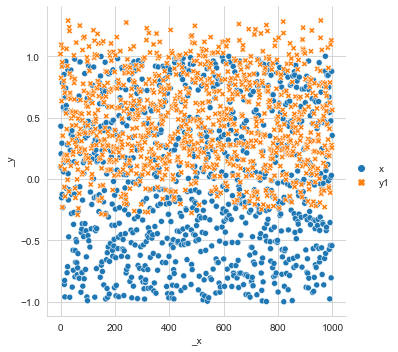

In [12]:
# dependency = sbn.load_dataset('exercise')
# index = pd.date_range('1 1 1000', periods=100, freq='m', name='date')
# wide = pd.DataFrame(dependency_dat, index, ['x','y1','y2','y3','y4'])
sbn.relplot(data=dependency_dat[['x','y1']], kind='scatter' )
# sbn.scatterplot(data= [X, dependency_dat['y2']],sizes= (200, 200))
# sbn.scatterplot(data=dependency_dat[['x','y1']] , x='x', y='y1', hue='size', size='size',
#                     sizes= (20, 200), legend='full')

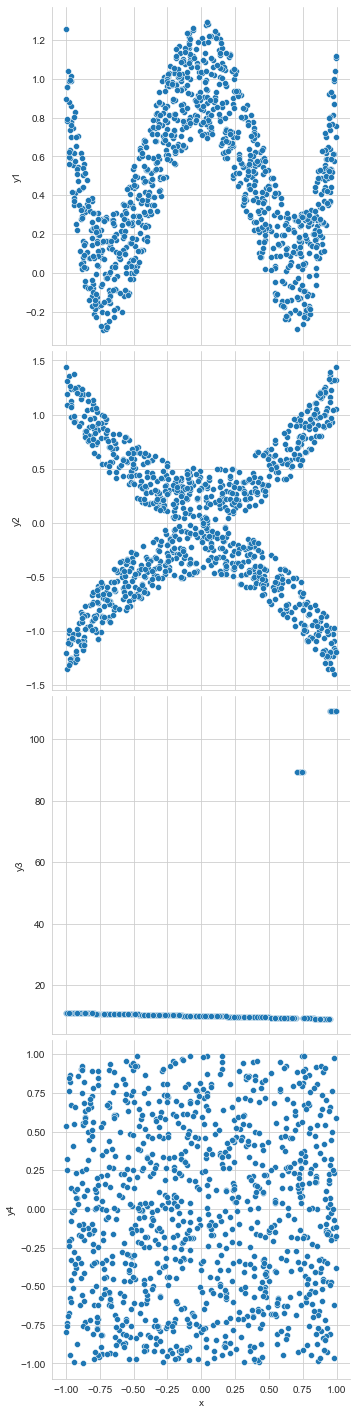

In [176]:
Y = ['y1','y2','y3','y4']
sbn.pairplot(dependency_dat, x_vars='x', y_vars= Y, corner=False, height= 5)

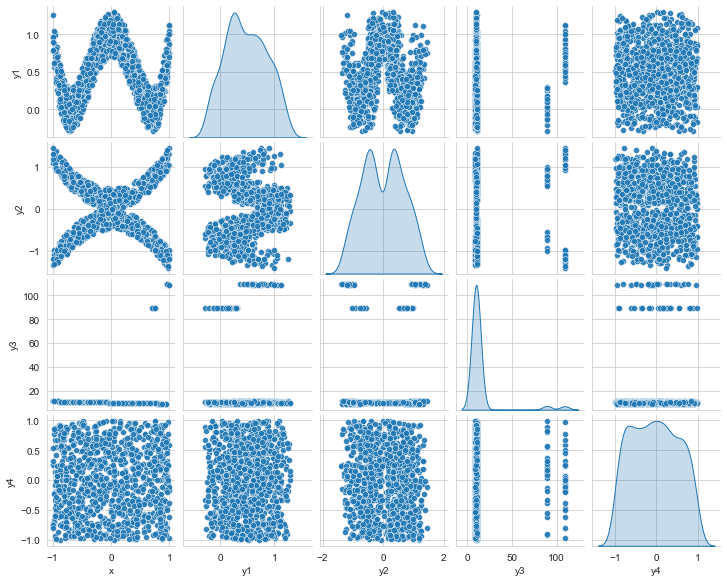

In [121]:
sbn.pairplot(dependency_dat, y_vars= Y, height=2.05, aspect= 1,diag_kind='kde', plot_kws={'alpha': 0.9}
             )

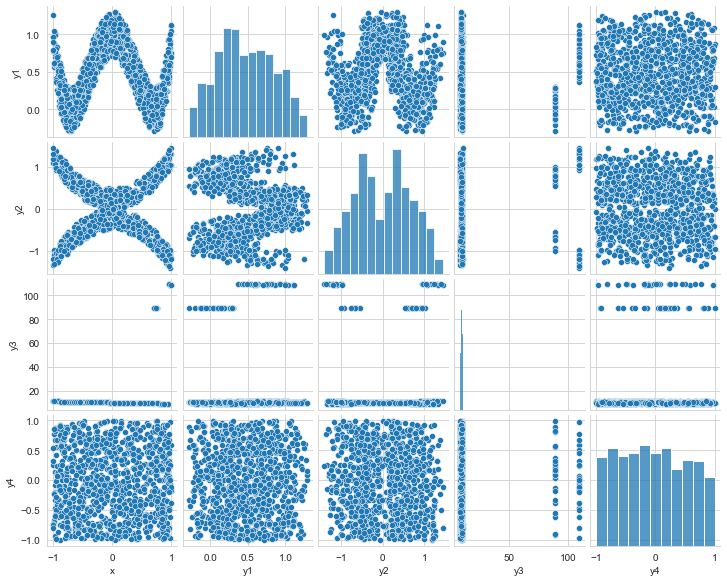

In [116]:
sbn.pairplot(dependency_dat, y_vars= Y, height=2.05, aspect= 1
             )


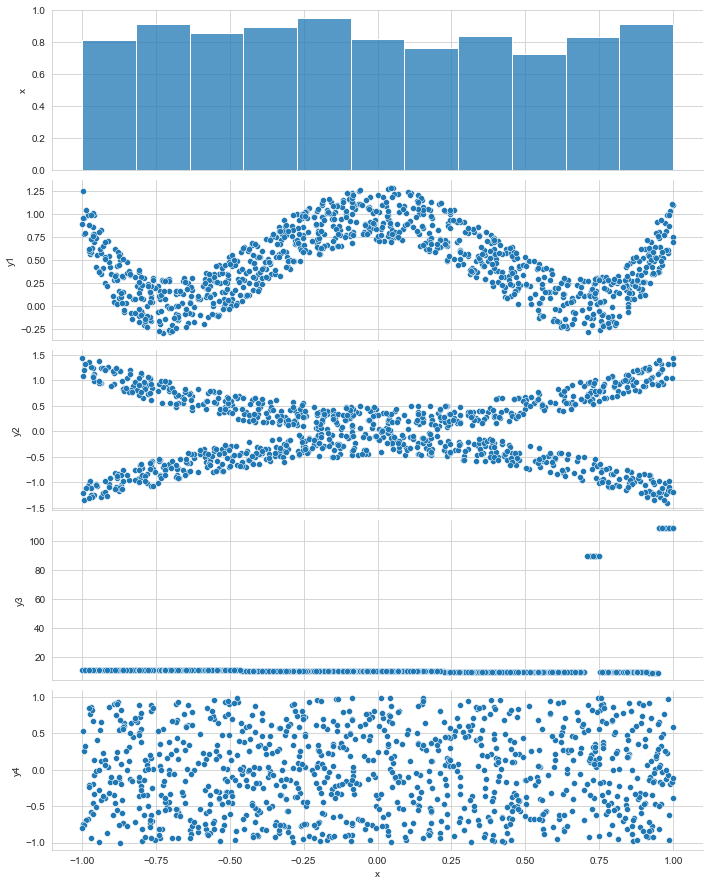

In [100]:
sbn.pairplot(dependency_dat, x_vars='x', height=2.5, aspect= 4)

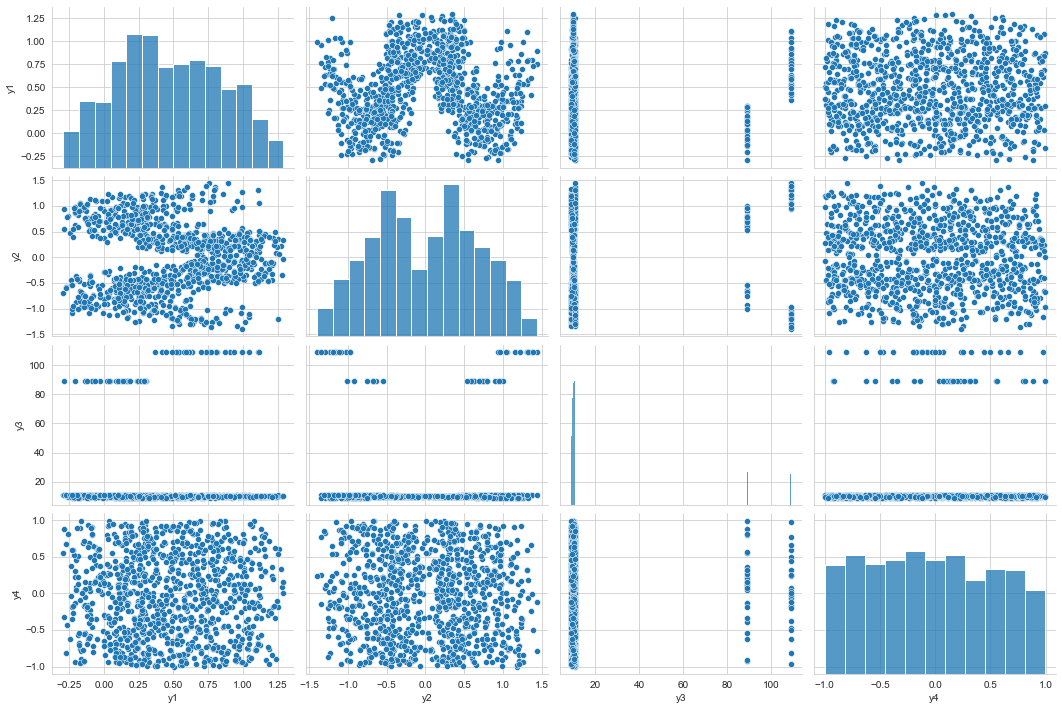

In [80]:
sbn.pairplot(dependency_dat, vars=Y, x_vars='x', height=2.5, aspect= 1.5)

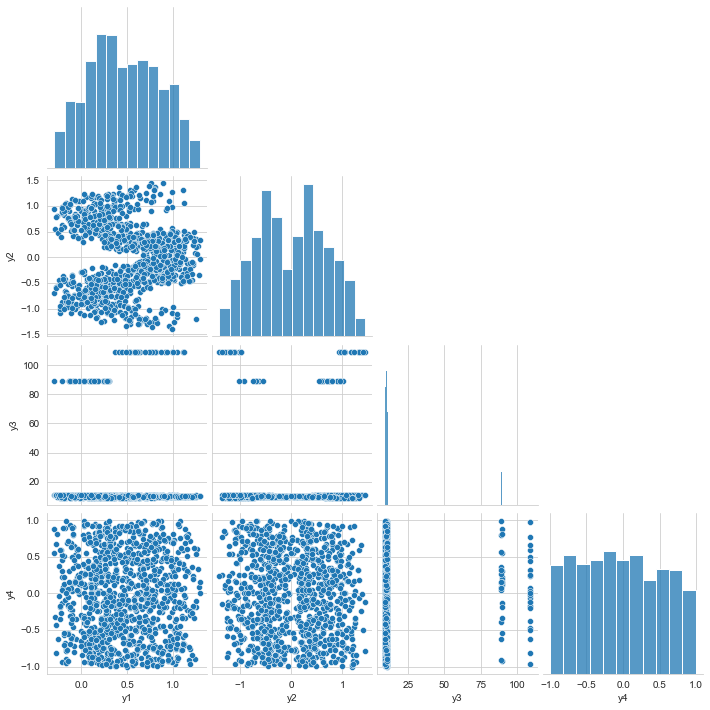

In [97]:
sbn.pairplot(dependency_dat, vars=Y, x_vars='x', height=2.5, corner=True)

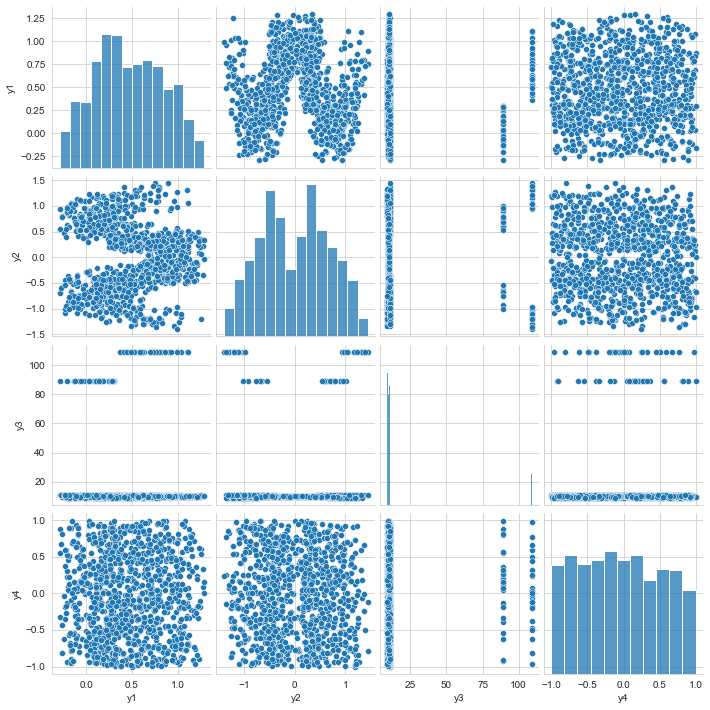

In [70]:
sbn.pairplot(dependency_dat, vars= Y, x_vars= 'x', corner=False, height=2.5)

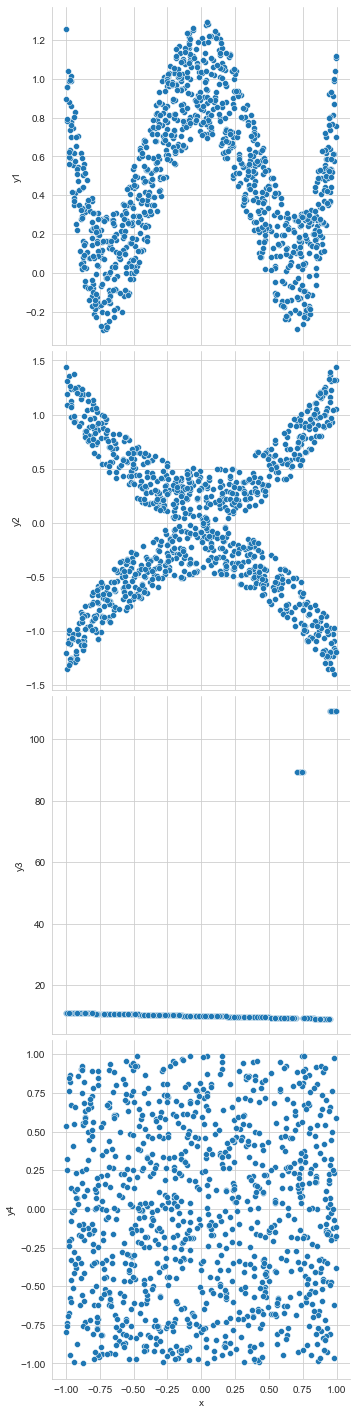

In [123]:
sbn.pairplot(dependency_dat, x_vars=['x'], y_vars= ['y1', 'y2', 'y3', 'y4'], height= 5)

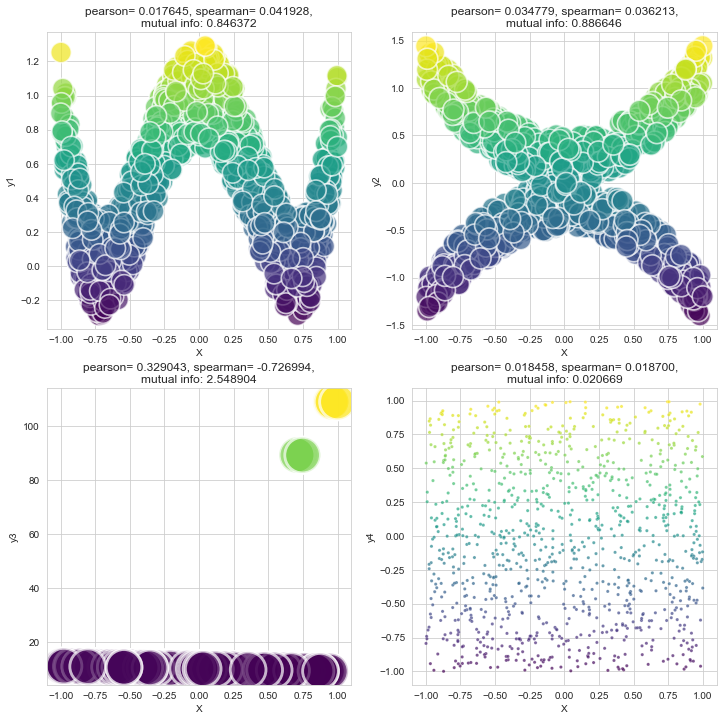

In [186]:
ys = ['y1', 'y2', 'y3', 'y4']
axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 12))[1]
for i, yi in enumerate(ys):
    j = int(i / 2)
    i %= 2
    y = dependency_dat[yi]
    p = pearson_corr(X,y)
    s = spearman_corr(X,y)
    mi = mir(X_mi,y)
    axs[j][i].set_title('pearson= %f, spearman= %f,\n'
                        'mutual info: %f' %(p, s, mi))
    axs[j][i].set_xlabel('X')
    axs[j][i].set_ylabel(yi)
    sbn.scatterplot(data=dependency_dat.set_index('x')[yi] , ax=axs[j][i],  cmap ='viridis', c=dependency_dat[yi], alpha=0.7, s=500*mi)
# plt.colorbar()

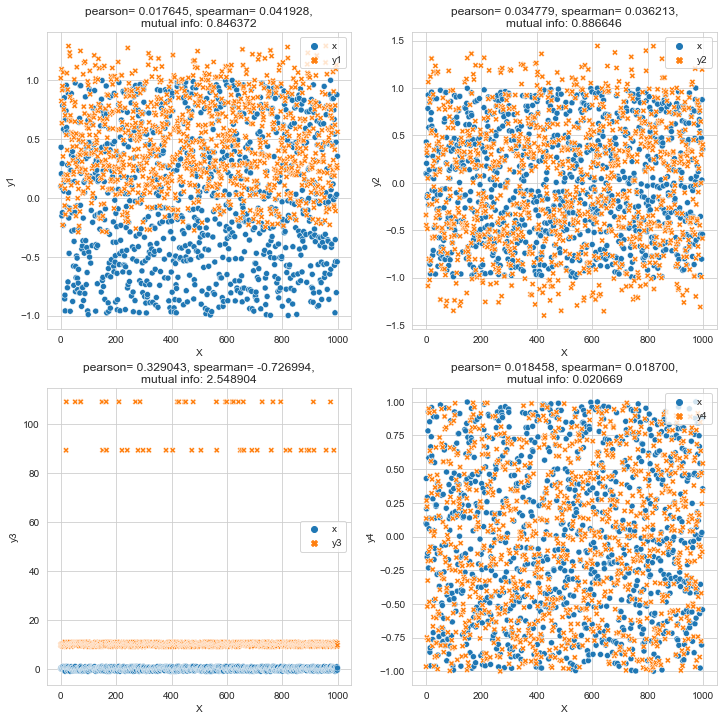

In [141]:
ys = ['y1', 'y2', 'y3', 'y4']
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 12))
for i, yi in enumerate(ys):
    j = int(i / 2)
    i %= 2
    y = dependency_dat[yi]
    p = pearson_corr(X,y)
    s = spearman_corr(X,y)
    mi = mir(X_mi,y)
    axs[j][i].set_title('pearson= %f, spearman= %f,\n'
                        'mutual info: %f' %(p, s, mi))
    axs[j][i].set_xlabel('X')
    axs[j][i].set_ylabel(yi)
    sbn.scatterplot(data=[dependency_dat['x'], dependency_dat[yi]] , ax=axs[j][i])

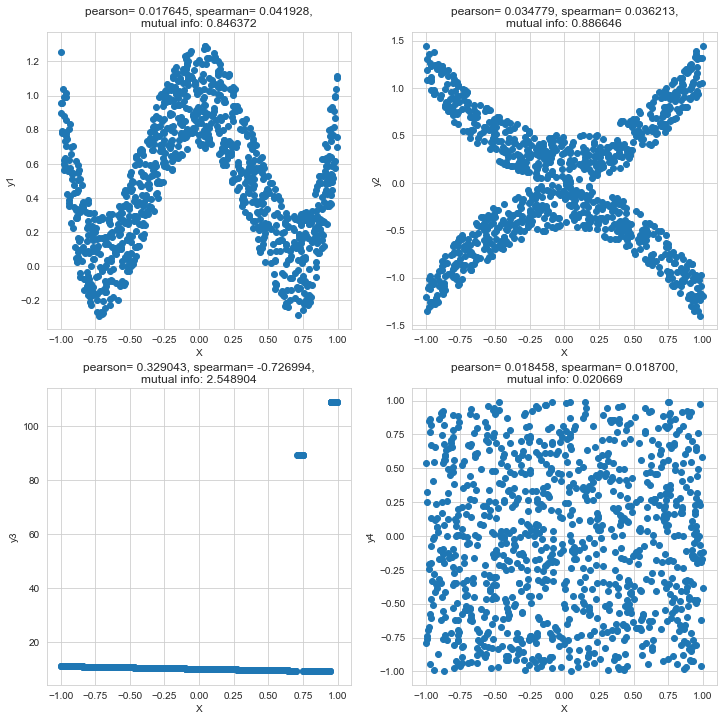

In [93]:
ys = ['y1', 'y2', 'y3', 'y4']
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 12))
for i, yi in enumerate(ys):
    j = int(i / 2)
    i %= 2
    y = dependency_dat[yi]
    p = pearson_corr(X,y)
    s = spearman_corr(X,y)
    mi = mir(X_mi,y)
    axs[j][i].set_title('pearson= %f, spearman= %f,\n'
                        'mutual info: %f' %(p, s, mi))
    axs[j][i].set_xlabel('X')
    axs[j][i].set_ylabel(yi)
    axs[j][i].scatter(x= X_mi, y= y)
                    # sizes= (20, 200), legend='full', ax= axs)



(6) Begründen Sie nun für jedes Datenreihenpaar, warum Sie Korrelationen oder keine Korrelation durch Pearson, Spearman und die Mutual Information angezeigt bekommen.

* Begründen Sie zusätzlich, warum Sie für Datenreihenpaar $(X, y_3)$ so unterschiedliche Ergebnisse für den Pearson- und den Spearman-Korrelationskoeffizienten erhalten haben.